# 📚 Importing Libraries

In [1]:
#Below is the code to set up the environment, and we are using scikit-learn to predict the house price:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 📁 Dataset

In [2]:
#read the prices data of the house:
data=pd.read_csv("housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,yes,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,yes,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,yes,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,yes,1,1,0,1,2,0,furnished


In [3]:
data.shape #data shape

(545, 13)

In [4]:
data.describe() # data stats

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [5]:
#check for nulls in the data
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# duplicate values check
data.duplicated().sum()

0

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(545, 13)

# Data Visualization 📊📈📉

# 📊 Pair Plot

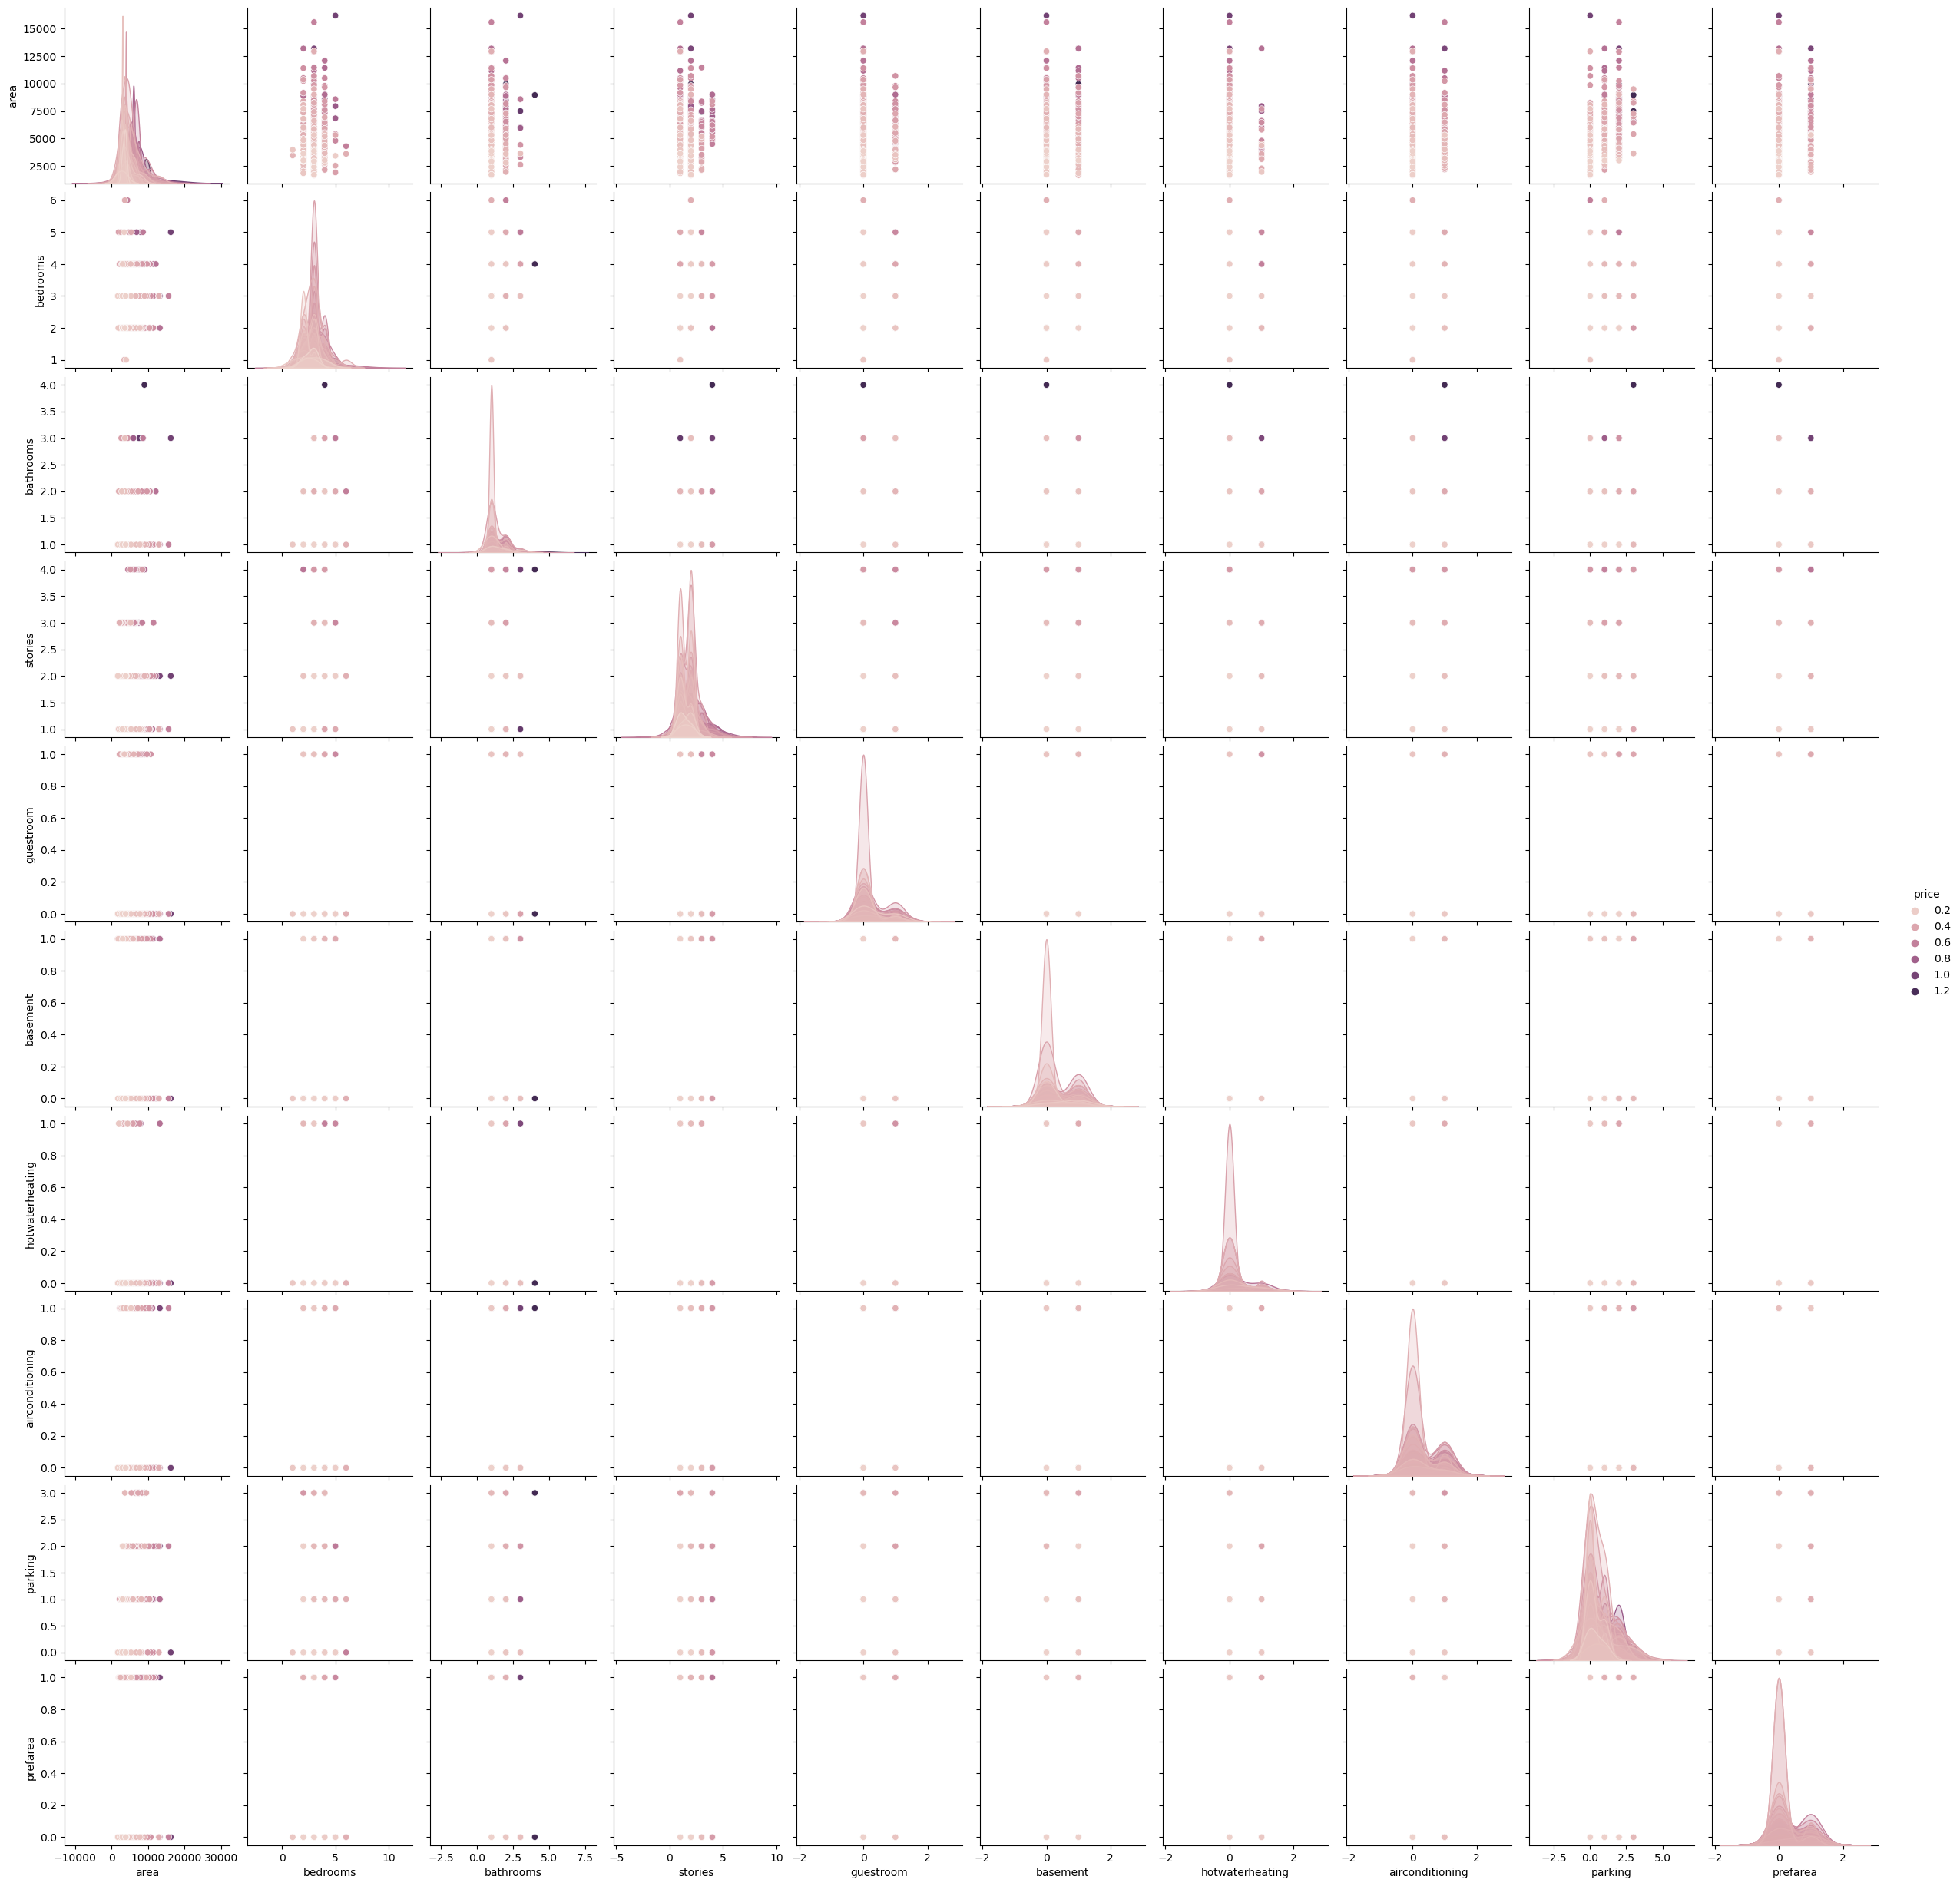

In [8]:
sns.pairplot(data, hue='price')

# 🌡️Heatmap 

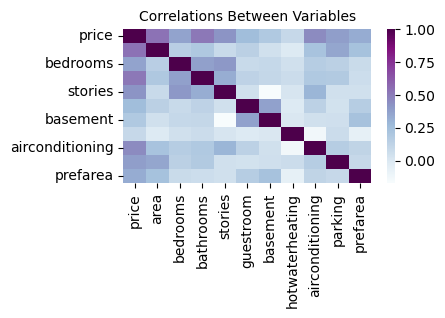

In [9]:
plt.figure(figsize=(4,2))
sns.heatmap(data.corr(), cmap="BuPu")
plt.title("Correlations Between Variables", size=10)
plt.show()

# 🛠️ Feature Engineering 

In [10]:
#Prepare the data which will define the predictor and response variable:
x=data[["area","bedrooms","bathrooms","stories","guestroom","basement","hotwaterheating","airconditioning","parking"]]
y=data["price"]  #response
x.head()

,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking
0,7420,4,2,3,0,0,0,1,2
1,8960,4,4,4,0,0,0,1,3
2,9960,3,2,2,0,1,0,0,2
3,7500,4,2,2,0,1,0,1,3
4,7420,4,1,2,1,1,0,1,2


In [11]:
#split data into the train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=200)
# the test set will be 20% of the whole data set

# 📈Model Training: Linear Regression 

In [12]:
#fit the model on the training set.
model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [13]:
y_predict=model.predict(x_test)

# 🧪Model Evaluation 


In [14]:
#Once we fit the model, then we have to print all coefficients.
print (model.intercept_)
print (model.coef_)

35236.22486039437
[3.04927893e+02 1.16550344e+05 9.12627802e+05 4.68263301e+05
 3.98088605e+05 5.11511728e+05 5.00580786e+05 9.84351630e+05
 3.24167075e+05]


In [15]:
# Calculate the accuracy
model.score(x_test, y_test)

0.63940832818522

In [16]:
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
r_squared = r2_score(y_test,model.predict(x_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MSE: 1207494314440.8628
RMSE: 1098860.4617697657
R2 Score: 0.63940832818522


# 🎯Model Predictions 

In [17]:
y_predict

array([ 6588394.59040036,  5731397.10000722,  4787909.37776622,
        4895496.70211913,  5740863.19217061,  3601444.27480588,
        2881136.70315436,  3946105.83754135,  5280672.17101377,
        5171453.76278391,  5479382.36960591,  3190837.50018706,
        6241799.85695853,  4443311.02281445,  6438566.93600346,
        3811279.05760806,  4016626.62625944,  2513698.5924412 ,
        3501055.53853596,  3187685.849718  ,  3767911.40776835,
        4928230.35810374,  3021403.53380005,  2576208.81044634,
        5062793.41753295,  4385225.85671914,  5527095.41189285,
        3780269.23383314,  5211756.82361651,  6059786.63032874,
        7337832.47264346,  6288413.43305084,  3032274.99597889,
        5266741.59988653,  5147939.94943752,  5011065.80800129,
        3359450.06929461,  3390209.00842578,  4146713.72969269,
        3161670.36444574,  5569816.50173074,  5317941.26299933,
        6933665.11953637,  3671314.4726191 ,  4695207.72796631,
        3399623.72021626,  2752419.07954